In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/home/hogar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [82]:
L = 0.0005 #Distancia en conductor rectilíneo
R = 0.02172 #Radio en espira circular
D = 5000 #Densidad de espiras en solenoide

In [83]:
#Valores de campo magnético

B_1 = [0.0678, 0.1005,0.1445,0.2068,0.2735,0.3281,0.3490, 0.3929]

B_2 = [0.0454,0.0715,0.0713,0.0954,0.0949,0.1218, 0.1184,0.1297]

B_3 = [1.7765,2.7243,3.5306,5.0512,6.0895,6.5783,8.1768,8.6766]

In [84]:
#Valores de corriente

I_1 = [1.5,3,4.5,6,7.5,9,10.5,11.3]

I_2 = [1,2,3,4,5,6,7,8]

I_3 = [1,2,3,4,5,6,7,8]
 

In [85]:
configs = pd.DataFrame({'Config 1':B_1,'Corriente 1':I_1,'Config 2':B_2,
                        'Corriente 2':I_2, 'Config 3':B_3,'Corriente 3':I_3})
configs

,Config 1,Corriente 1,Config 2,Corriente 2,Config 3,Corriente 3
0,0.0678,1.5,0.0454,1,1.7765,1
1,0.1005,3.0,0.0715,2,2.7243,2
2,0.1445,4.5,0.0713,3,3.5306,3
3,0.2068,6.0,0.0954,4,5.0512,4
4,0.2735,7.5,0.0949,5,6.0895,5
5,0.3281,9.0,0.1218,6,6.5783,6
6,0.3490,10.5,0.1184,7,8.1768,7
7,0.3929,11.3,0.1297,8,8.6766,8


0.0341 0.0054
Permeabilidad magnética considerando la pendiente: 1.0712830948741195e-06


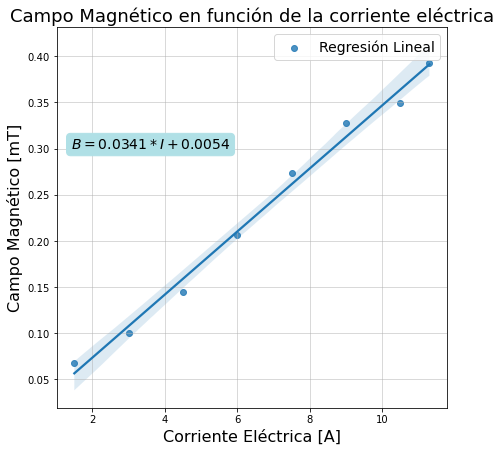

In [111]:
plt.figure(figsize=(7,7))
sns.regplot(x=configs.values[:,1],y=configs.values[:,0], data = configs, label = "Regresión Lineal" )

slope, intercept = np.round(np.polyfit(configs.values[:,1], configs.values[:,0], 1),4)
plt.legend(fontsize=14)
print(slope, intercept)

plt.grid(alpha=.6)
plt.legend(fontsize=14)
plt.title("Campo Magnético en función de la corriente eléctrica", size=18)
plt.text(1.4, 0.3,r"$B = 0.0341*I + 0.0054$", size=14, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.xlabel('Corriente Eléctrica [A]', size=16)
plt.ylabel('Campo Magnético [mT]', size=16)


print("Permeabilidad magnética considerando la pendiente: " + str(2*np.pi*slope*L*10e-3))


0.0116 0.0413
Permeabilidad magnética considerando la pendiente: 1.583061104514511e-05


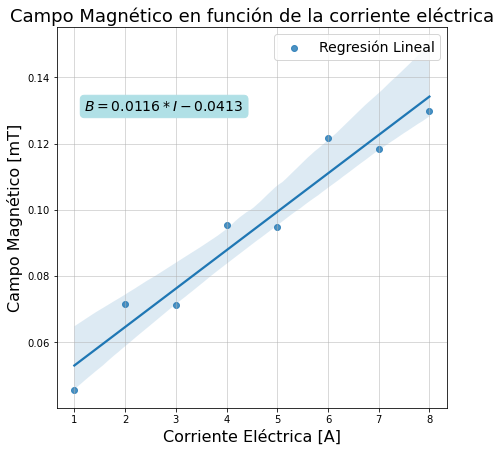

In [110]:
plt.figure(figsize=(7,7))
sns.regplot(x=configs.values[:,3],y=configs.values[:,2], data = configs, label='Regresión Lineal')

slope, intercept = np.round(np.polyfit(configs.values[:,3], configs.values[:,2], 1),4)

plt.legend(fontsize=14)
print(slope, intercept)

plt.grid(alpha=.6)
plt.legend(fontsize=14)
plt.title("Campo Magnético en función de la corriente eléctrica", size=18)
plt.text(1.2, 0.13,r"$B = 0.0116*I - 0.0413$", size=14, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.xlabel('Corriente Eléctrica [A]', size=16)
plt.ylabel('Campo Magnético [mT]', size=16)

print("Permeabilidad magnética considerando la pendiente: " + str(2*np.pi*slope*R*10e-3))

1.0208 0.732
Permeabilidad magnética considerando la pendiente: 2.0416e-06


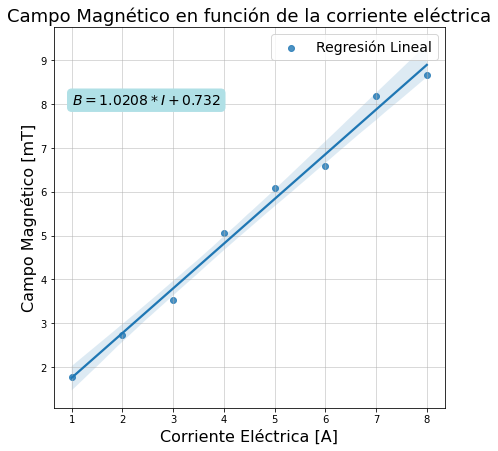

In [109]:
plt.figure(figsize=(7,7))
sns.regplot(x=configs.values[:,5],y=configs.values[:,4], data = configs, label='Regresión Lineal' )

slope, intercept = np.round(np.polyfit(configs.values[:,5], configs.values[:,4], 1),4)
print(slope, intercept)

plt.legend(fontsize=14)

plt.grid(alpha=.6)
plt.legend(fontsize=14)
plt.title("Campo Magnético en función de la corriente eléctrica", size=18)
plt.text(1, 8,r"$B = 1.0208*I + 0.732$", size=14, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.xlabel('Corriente Eléctrica [A]', size=16)
plt.ylabel('Campo Magnético [mT]', size=16)

print("Permeabilidad magnética considerando la pendiente: " + str(slope/D*10e-3))

In [89]:
##### Campo magnético de espira rectilinea y circular
def m(I,B,r):
    mu = (2 * np.pi * r * B*(10)**-3) / I
    return mu

#Campo magnético del solenoide 
def f(I,B,rho):
    mu = B*(10)**-3 / rho * I
    return mu

In [90]:
mu_1=[]
mu_2=[]
mu_3=[]

for i in range(0,8):
    l = m(I_1[i], B_1[i], L)
    mu_1.append(l)

for i in range(0,8):
    s = m(I_2[i], B_2[i], R)
    mu_2.append(s)

for i in range(0,8):
    n = f(I_3[i],B_3[i],D)
    mu_3.append(n)
    

In [91]:
i_1_1=[0.0721,0.0655,0.0735,0.0601,]
i_1_2=[0.1028, 0.1011, 0.0998, 0.0982]
i_1_3=[0.1326,0.1427,0.1544,0.1482]
i_1_4=[0.2135,0.2054,0.2013,0.2069]
i_1_5=[0.2714,0.2700,0.2732,0.2792]
i_1_6=[0.3312,0.3150,0.3356,0.3306]
i_1_7=[0.3751,0.3950,0.4051,0.3964]
i_1_8=[0.3539,0.3505,0.3374,0.3541]


i_2_1=[0.0355,0.0326,0.0580,0.0556]
i_2_2=[0.0725,0.0658,0.0634,0.0841]
i_2_3=[0.0864,0.0680,0.0658,0.0648]
i_2_4=[0.0851,0.0922,0.1024,0.1020]
i_2_5=[0.0848,0.0842,0.1019,0.1087]
i_2_6=[0.1337,0.1088,0.1302,0.1144]
i_2_7=[0.1205,0.1195,0.1126,0.1210]
i_2_8=[0.1259,0.1315,0.1401,0.1213]

i_3_1=[1.7759,1.7829,1.7716,1.7756]
i_3_2=[2.7167, 2.7217,2.7225,2.7364]
i_3_3=[3.5370,3.5287,3.5298,3.5269]
i_3_4=[5.0448,5.0549,5.0444,5.0605]
i_3_5=[6.0773,6.0894,6.0931,6.0983]
i_3_6=[6.5988,6.5749,6.5704,6.5690]
i_3_7=[8.1829,8.1810,8.1726,8.1705]
i_3_8=[8.7098,8.6831,8.6556,8.6579]

In [92]:
B_1_meds=pd.DataFrame({"B_1_1:":i_1_1,"B_1_2:":i_1_2,"B_1_3:":i_1_3,"B_1_4:":i_1_4,"B_1_5:":i_1_5,
             "B_1_6:":i_1_6,"B_1_7:":i_1_7,"B_1_8:":i_1_8} )
B_1_meds

,B_1_1:,B_1_2:,B_1_3:,B_1_4:,B_1_5:,B_1_6:,B_1_7:,B_1_8:
0,0.0721,0.1028,0.1326,0.2135,0.2714,0.3312,0.3751,0.3539
1,0.0655,0.1011,0.1427,0.2054,0.2700,0.3150,0.3950,0.3505
2,0.0735,0.0998,0.1544,0.2013,0.2732,0.3356,0.4051,0.3374
3,0.0601,0.0982,0.1482,0.2069,0.2792,0.3306,0.3964,0.3541


In [93]:
B_2_meds=pd.DataFrame({"B_2_1:":i_2_1,"B_2_2:":i_2_2,"B_2_3:":i_2_3,"B_2_4:":i_2_4,"B_1_5:":i_1_5,
             "B_2_6:":i_2_6,"B_2_7:":i_2_7,"B_2_8:":i_2_8} )
B_2_meds

,B_2_1:,B_2_2:,B_2_3:,B_2_4:,B_1_5:,B_2_6:,B_2_7:,B_2_8:
0,0.0355,0.0725,0.0864,0.0851,0.2714,0.1337,0.1205,0.1259
1,0.0326,0.0658,0.0680,0.0922,0.2700,0.1088,0.1195,0.1315
2,0.0580,0.0634,0.0658,0.1024,0.2732,0.1302,0.1126,0.1401
3,0.0556,0.0841,0.0648,0.1020,0.2792,0.1144,0.1210,0.1213


In [94]:
B_3_meds=pd.DataFrame({"B_3_1:":i_3_1,"B_3_2:":i_3_2,"B_3_3:":i_3_3,"B_3_4:":i_3_4,"B_3_5:":i_3_5,
             "B_3_6:":i_3_6,"B_3_7:":i_3_7,"B_3_8:":i_3_8} )
B_3_meds

,B_3_1:,B_3_2:,B_3_3:,B_3_4:,B_3_5:,B_3_6:,B_3_7:,B_3_8:
0,1.7759,2.7167,3.5370,5.0448,6.0773,6.5988,8.1829,8.7098
1,1.7829,2.7217,3.5287,5.0549,6.0894,6.5749,8.1810,8.6831
2,1.7716,2.7225,3.5298,5.0444,6.0931,6.5704,8.1726,8.6556
3,1.7756,2.7364,3.5269,5.0605,6.0983,6.5690,8.1705,8.6579


In [95]:
Deltas_B1= pd.DataFrame({"B1": B_1_meds.std() })
Deltas_B1

,B1
B_1_1:,0.006206
B_1_2:,0.001952
B_1_3:,0.009247
B_1_4:,0.005070
B_1_5:,0.004051
B_1_6:,0.009013
B_1_7:,0.012680
B_1_8:,0.007892


In [96]:
Deltas_B2= pd.DataFrame({"B2": B_2_meds.std() })
Deltas_B2

,B2
B_2_1:,0.013224
B_2_2:,0.009271
B_2_3:,0.010188
B_2_4:,0.008344
B_1_5:,0.004051
B_2_6:,0.012054
B_2_7:,0.003917
B_2_8:,0.008091


In [97]:
Deltas_B3= pd.DataFrame({"B3": B_3_meds.std() })
Deltas_B3

,B3
B_3_1:,0.004695
B_3_2:,0.008449
B_3_3:,0.004431
B_3_4:,0.007903
B_3_5:,0.008930
B_3_6:,0.013913
B_3_7:,0.006115
B_3_8:,0.025398


In [98]:
def delta_mu_a(I,r,db):
    du = (s*np.pi*r)*db/I #Estoy ignorando la resolución del medidor de la corriente (discutir)
    return du

def delta_mu_b(rho,I,db): 
    du = db/rho*I #Estoy ignorando la resolución del medidor de la corriente (discutir)
    return du
    

In [99]:
du_1 = [] #desviaciones de miu en el conductor rectilíneo
for i in range(0,8):
    k = np.round(delta_mu_a(I_1[i], L, Deltas_B1.iloc[i,0]),14)
    du_1.append(k)
    
du_2 = [] #desviaciones de miu en espira circular
for i in range(0,8):
    k = np.round(delta_mu_a(I_2[i], L, Deltas_B2.iloc[i,0]),14)
    du_2.append(k)
    
du_3 = [] #desviaciones de miu en solenoide
for i in range(0,8):
    k = np.round(delta_mu_b(D,I_3[i], Deltas_B3.iloc[i,0]),14)
    du_3.append(k)

In [100]:
Deltas_mu_1=pd.DataFrame({"Rectilíneo":du_1,"Circular":du_2,"Solenoide":du_3} )
Deltas_mu_1

,Rectilíneo,Circular,Solenoide
0,1.438000e-11,4.596000e-11,9.390776e-07
1,2.260000e-12,1.611000e-11,3.379684e-06
2,7.140000e-12,1.180000e-11,2.658571e-06
3,2.940000e-12,7.250000e-12,6.322362e-06
4,1.880000e-12,2.820000e-12,8.930239e-06
5,3.480000e-12,6.980000e-12,1.669550e-05
6,4.200000e-12,1.940000e-12,8.560631e-06
7,2.430000e-12,3.520000e-12,4.063685e-05


In [101]:
mus = pd.DataFrame({"Rectilíneo":mu_1, "Circular":mu_2,"Solenoide":mu_3}) #Deltas por progamación de errores
mus

,Rectilíneo,Circular,Solenoide
0,1.420000e-07,0.000006,3.553000e-07
1,1.052434e-07,0.000005,1.089720e-06
2,1.008800e-07,0.000003,2.118360e-06
3,1.082802e-07,0.000003,4.040960e-06
4,1.145634e-07,0.000003,6.089500e-06
5,1.145285e-07,0.000003,7.893960e-06
6,1.044206e-07,0.000002,1.144752e-05
7,1.092329e-07,0.000002,1.388256e-05
